In [1]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hypernetx as hnx

In [3]:
url = "https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv"
df = pd.read_csv(url)
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [4]:
df.shape

(315, 7)

# Itemset Mining Methods

In [5]:
#prueba del método de extracción de itemsets frecuentes
fpgrowth(df.values, supp=20) #extraer todos los itemsets frecuentes con al menos 20% de soporte mínimo

[((nan,), 274),
 (('Cheese', nan), 124),
 (('Cheese',), 158),
 (('Bread', nan), 125),
 (('Bread', 'Cheese'), 75),
 (('Bread',), 159),
 (('Milk', nan), 129),
 (('Milk', 'Cheese', nan), 74),
 (('Milk', 'Cheese'), 96),
 (('Milk', 'Bread'), 88),
 (('Milk',), 158),
 (('Meat', nan), 116),
 (('Meat', 'Cheese', nan), 74),
 (('Meat', 'Cheese'), 102),
 (('Meat', 'Bread'), 65),
 (('Meat', 'Milk', 'Cheese'), 64),
 (('Meat', 'Milk'), 77),
 (('Meat',), 150),
 (('Wine', nan), 100),
 (('Wine', 'Cheese'), 85),
 (('Wine', 'Bread'), 77),
 (('Wine', 'Milk'), 69),
 (('Wine', 'Meat'), 79),
 (('Wine',), 138),
 (('Eggs', nan), 106),
 (('Eggs', 'Cheese', nan), 69),
 (('Eggs', 'Cheese'), 94),
 (('Eggs', 'Milk'), 77),
 (('Eggs', 'Meat', 'Cheese'), 68),
 (('Eggs', 'Meat'), 84),
 (('Eggs', 'Wine'), 76),
 (('Eggs',), 138),
 (('Bagel', nan), 106),
 (('Bagel', 'Bread', nan), 67),
 (('Bagel', 'Bread'), 88),
 (('Bagel', 'Milk'), 71),
 (('Bagel',), 134),
 (('Diaper', nan), 100),
 (('Diaper', 'Cheese'), 63),
 (('Diaper',

In [6]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

## Remove NaN from transactions

In [7]:
data = []
for i in range(df.shape[0]): #para todas las filas/transacciones
  fila = df.iloc[i,:].values #recuperar la fila i con todas sus columnas
  fila = fila[~pd.isnull(fila)] #mantener todos los elementos que no sean null/nan en la fila
  data.append(fila.tolist()) #agregar la fila limpia a la data
data

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Meat', 'Pencil', 'Wine'],
 ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'],
 ['Wine', 'Pencil', 'Eggs', 'Cheese'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper'],
 ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'],
 ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'],
 ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat'],
 ['Bagel', 'Cheese', 'Milk', 'Meat'],
 ['Bread'],
 ['Pencil', 'Diaper', 'Bagel'],
 ['Meat', 'Bagel', 'Bread'],
 ['Bread', 'Bagel', 'Milk'],
 ['Diaper'],
 ['Bagel', 'Cheese', 'Meat', 'Bread', 'Diaper', 'Eggs'],
 ['Meat', 'Pencil', 'Cheese', 'Bread'],
 ['Cheese', 'Eggs', 'Wine', 'Bread', 'Milk', 'Pencil', 'Meat'],
 ['

In [8]:
#extraer todos los itemsets frecuentes con al menos 20% de soporte mínimo y tamaño mínimo de 2
r = fpgrowth(data, supp=20, zmin=2)
df_ = pd.DataFrame(r)
df_.columns = ['Itemset', 'Freq']
df_.sort_values(by='Freq', ascending=False)

,Itemset,Freq
3,"(Meat, Cheese)",102
1,"(Milk, Cheese)",96
11,"(Eggs, Cheese)",94
2,"(Milk, Bread)",88
16,"(Bagel, Bread)",88
7,"(Wine, Cheese)",85
14,"(Eggs, Meat)",84
10,"(Wine, Meat)",79
12,"(Eggs, Milk)",77
6,"(Meat, Milk)",77


In [9]:
fpgrowth(data, supp=-20)

[(('Cheese',), 158),
 (('Bread', 'Cheese'), 75),
 (('Bread',), 159),
 (('Milk', 'Cheese'), 96),
 (('Milk', 'Bread', 'Cheese'), 41),
 (('Milk', 'Bread'), 88),
 (('Milk',), 158),
 (('Meat', 'Cheese'), 102),
 (('Meat', 'Bread', 'Cheese'), 45),
 (('Meat', 'Bread'), 65),
 (('Meat', 'Milk', 'Cheese'), 64),
 (('Meat', 'Milk', 'Bread', 'Cheese'), 24),
 (('Meat', 'Milk', 'Bread'), 33),
 (('Meat', 'Milk'), 77),
 (('Meat',), 150),
 (('Wine', 'Cheese'), 85),
 (('Wine', 'Bread', 'Cheese'), 45),
 (('Wine', 'Bread'), 77),
 (('Wine', 'Milk', 'Cheese'), 51),
 (('Wine', 'Milk', 'Bread', 'Cheese'), 27),
 (('Wine', 'Milk', 'Bread'), 41),
 (('Wine', 'Milk'), 69),
 (('Wine', 'Meat', 'Cheese'), 53),
 (('Wine', 'Meat', 'Bread', 'Cheese'), 28),
 (('Wine', 'Meat', 'Bread'), 42),
 (('Wine', 'Meat', 'Milk', 'Cheese'), 32),
 (('Wine', 'Meat', 'Milk', 'Bread'), 24),
 (('Wine', 'Meat', 'Milk'), 40),
 (('Wine', 'Meat'), 79),
 (('Wine',), 138),
 (('Eggs', 'Cheese'), 94),
 (('Eggs', 'Bread', 'Cheese'), 37),
 (('Eggs', 

## Explore the data

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'], ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Meat', 'Pencil', 'Wine'], ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'], ['Wine', 'Pencil', 'Eggs', 'Cheese'], ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper'], ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'], ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'], ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat'], ['Bagel', 'Cheese', 'Milk', 'Meat'], ['Bread'], ['Pencil', 'Diaper', 'Bagel'], ['Meat', 'Bagel', 'Bread'], ['Bread', 'Bagel', 'Milk'], ['Diaper'], ['Bagel', 'Cheese', 'Meat', 'Bread', 'Diaper', 'Eggs'], ['Meat', 'Pencil', 'Cheese', 'Bread'], ['Cheese', 'Eggs', 'Wine', 'Bread', 'Milk', 'Pencil', 'Meat'], ['Eggs', 'Bagel', 'Chees

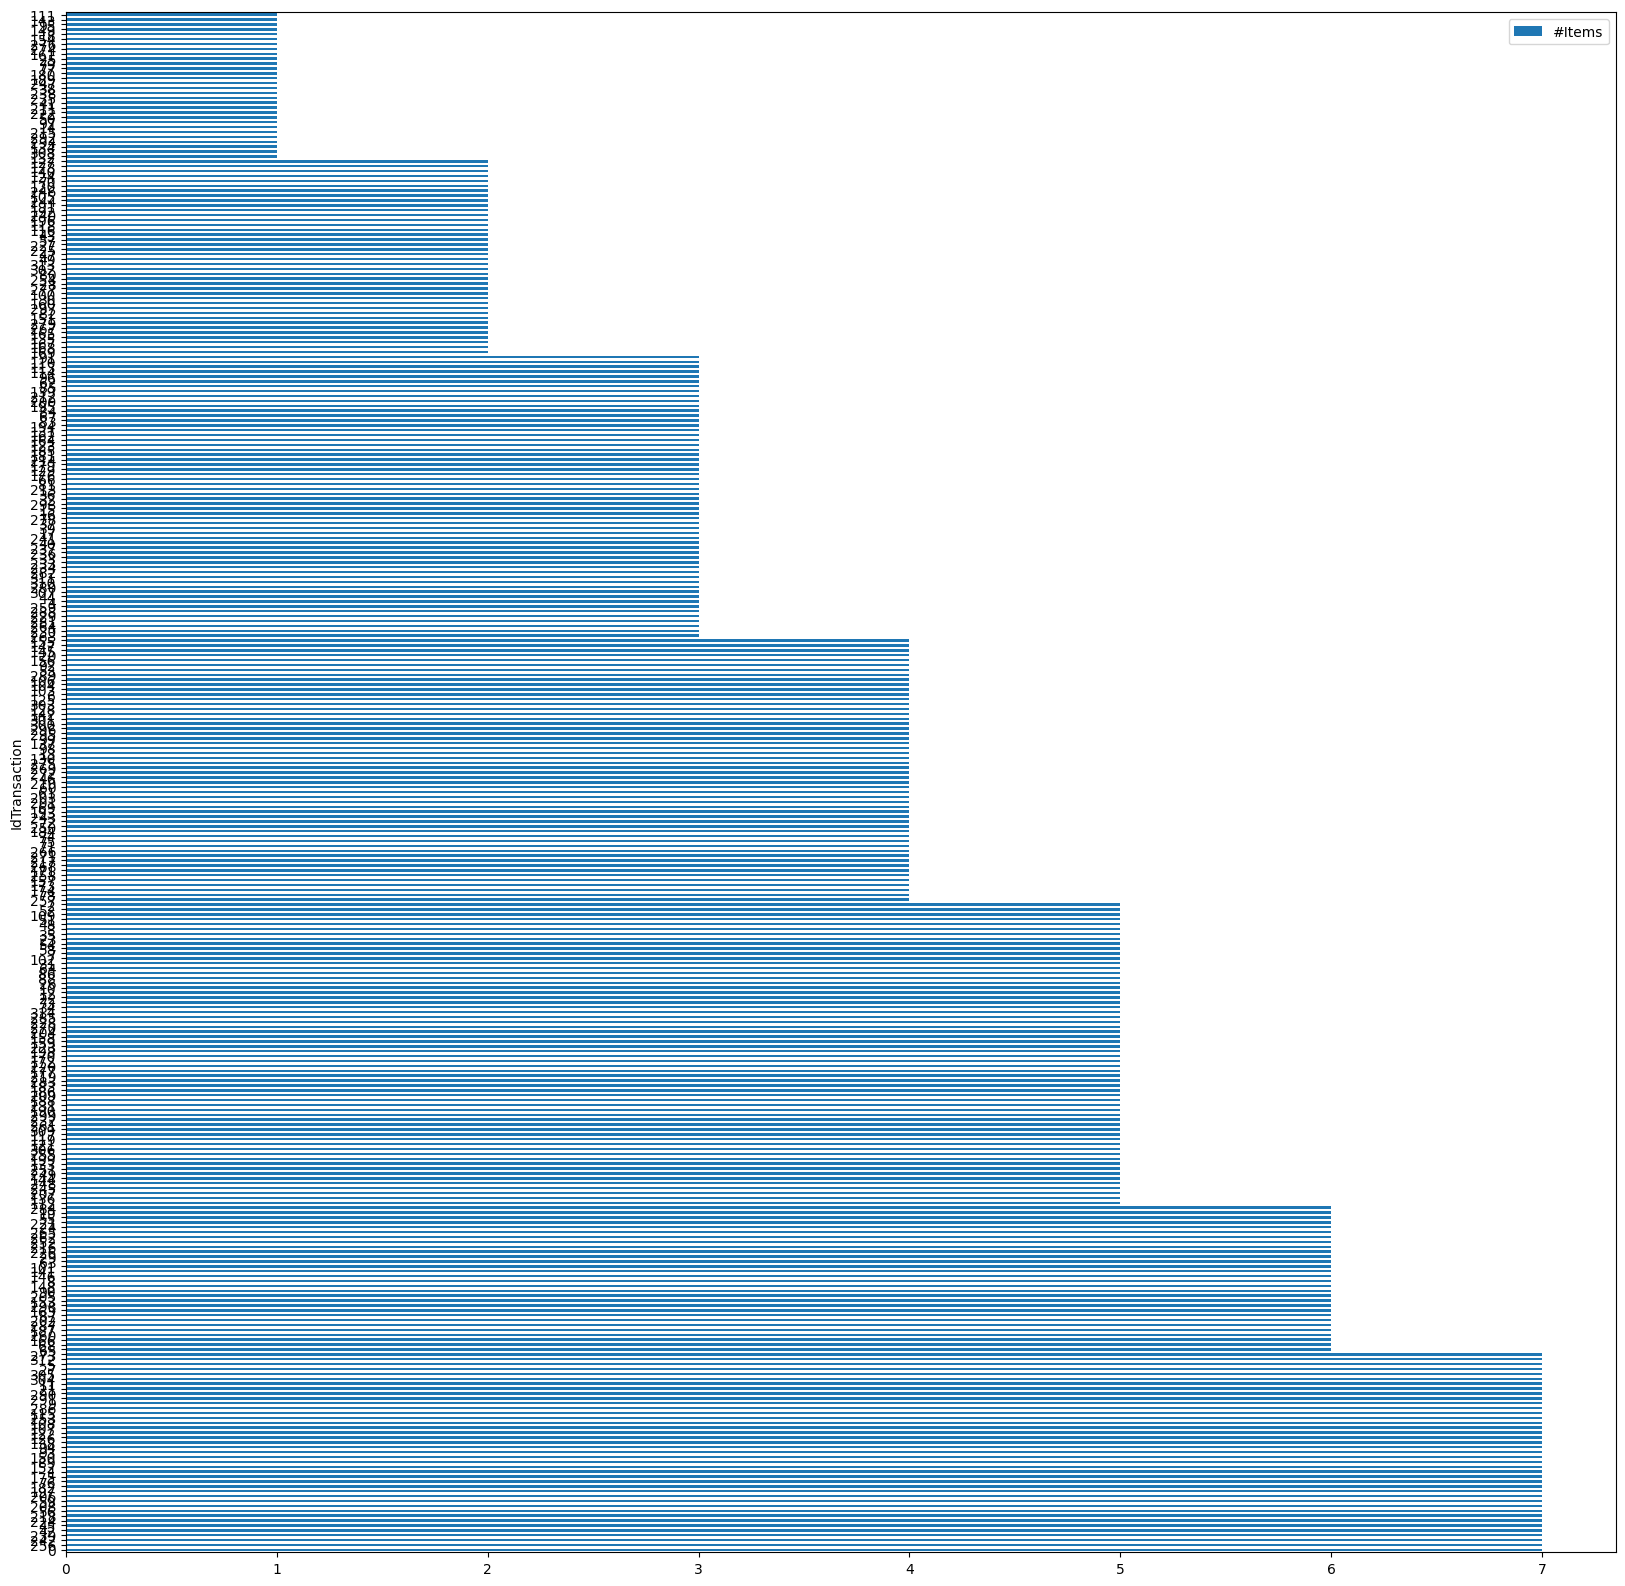

In [10]:
print(data)
trans = [(i,len(data[i])) for i in range(len(data))] #bucle para obtener pares de elementos, con el índice y tamaño de cada transacción
print(trans)
#transformar el resultado en un dataframe
df_data = pd.DataFrame(trans)
df_data.columns = ['IdTransaction', '#Items']
df_data.sort_values(by='#Items', ascending=False, inplace=True)
df_data.plot.barh(x='IdTransaction', y='#Items', figsize=(20,20))
plt.show()

## Count by number of items

In [ ]:
df_data.groupby(['#Items']).count() #obtener el conteo de clientes según cantidad de items/productos en su transacción/canasta

,IdTransaction
#Items,
1,30
2,40
3,58
4,54
5,62
6,30
7,41


In [11]:
df_data[df_data['#Items'] == 1] #obtener los clientes que compraron 1 solo producto

,IdTransaction,#Items
132,132,1
308,308,1
134,134,1
294,294,1
292,292,1
215,215,1
14,14,1
97,97,1
50,50,1
222,222,1


## Run the mining method


### All frequent itemsets with 1% minimum support and at most 1 item

In [ ]:
fpgrowth(data, supp=1, zmax=1)

[(('Cheese',), 158),
 (('Bread',), 159),
 (('Milk',), 158),
 (('Meat',), 150),
 (('Wine',), 138),
 (('Eggs',), 138),
 (('Bagel',), 134),
 (('Diaper',), 128),
 (('Pencil',), 114)]

### All frequent itemsets with 10% and 2 items

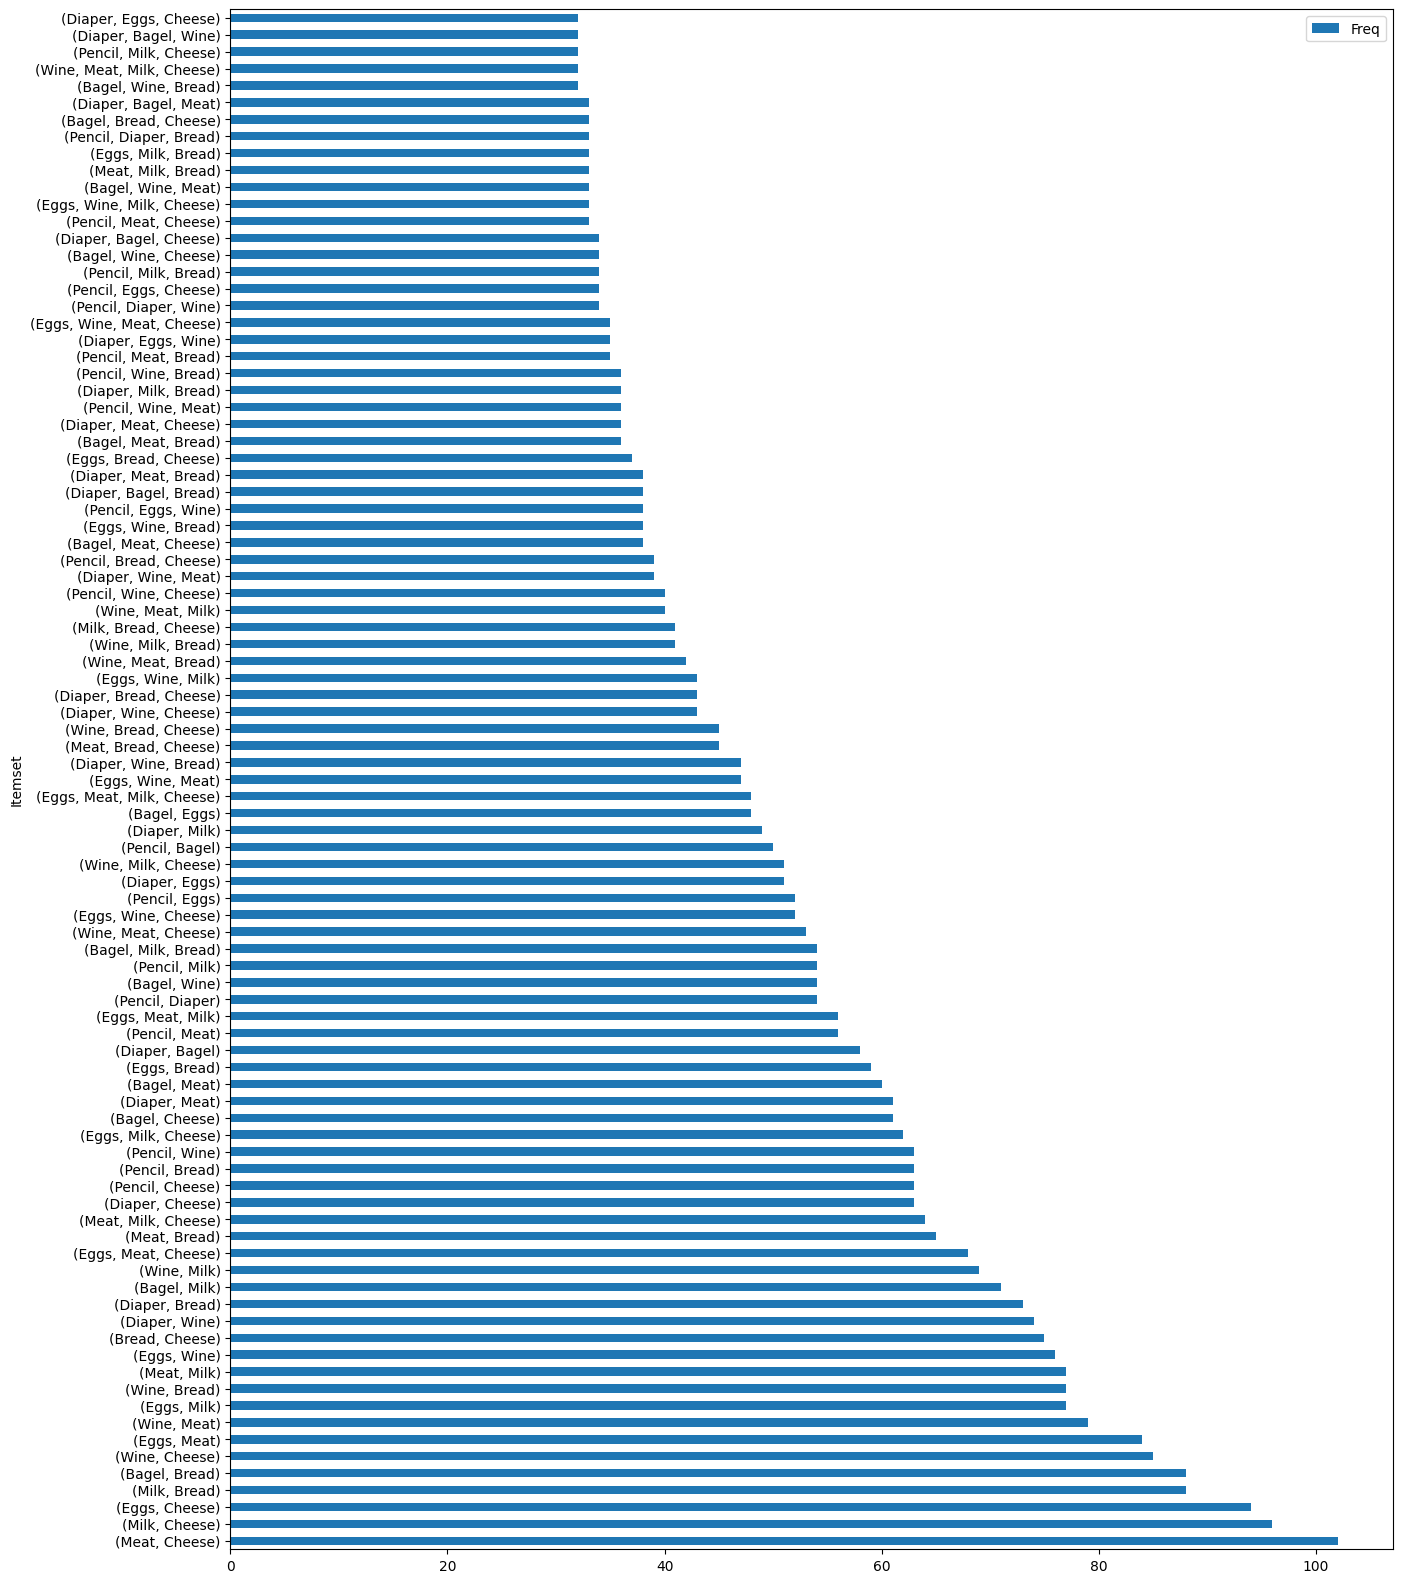

In [12]:
r = fpgrowth(data, supp=10, zmin=2)
df_itemsets = pd.DataFrame(r)
df_itemsets.columns = ['Itemset', 'Freq']
df_itemsets.sort_values(by='Freq', ascending=False, inplace=True)
df_itemsets.plot.barh(x='Itemset', y='Freq', figsize=(15,20))
plt.show()

## Plot results

{102: ('Meat', 'Cheese'), 96: ('Milk', 'Cheese'), 94: ('Eggs', 'Cheese'), 88: ('Milk', 'Bread'), 85: ('Wine', 'Cheese'), 84: ('Eggs', 'Meat'), 79: ('Wine', 'Meat'), 77: ('Eggs', 'Milk')}


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\hypernetx\classes\entityset.py:618: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elements = self._dataframe.grou

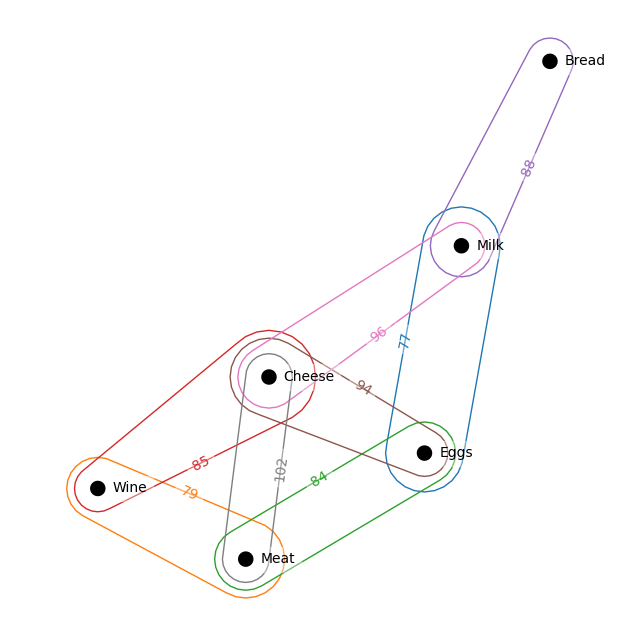

In [15]:
v = df_itemsets.iloc[:10,:].values #recuperar los 10 itemsets más frecuentes
#definir las entradas para el hipergrafo
scenes = {}
k = 1
for i in range(len(v)): #para cada itemset
  nodos = v[i][0] #recuperar el itemset
  if v[i][1] not in scenes:
    scenes[v[i][1]] = tuple(nodos)
print(scenes)
#dibujar hipergrafo
H = hnx.Hypergraph(scenes)
hnx.draw(H)